<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/MeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.799015013656436
Davies-Bouldin Index: 0.344019049866904
Number of clusters: 3
Number of noise points: 0


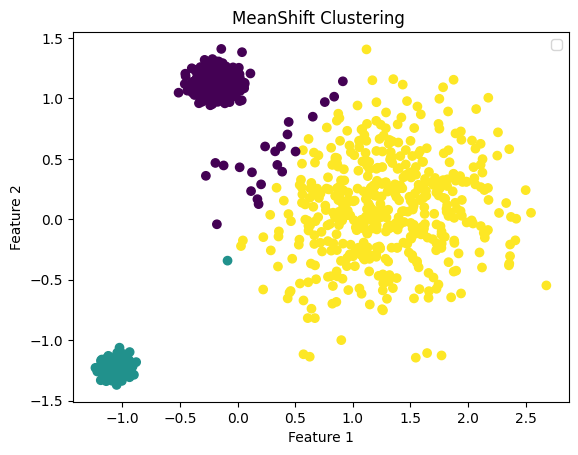

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

centers = 3
cluster_std = [0.5, 2.8, 0.3]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=cluster_std, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean_shift = MeanShift()
mean_shift.fit(X_scaled)
labels = mean_shift.labels_

silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

n_clusters = len(set(mean_shift.labels_)) - (1 if -1 in mean_shift.labels_ else 0)
n_noise = list(mean_shift.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('MeanShift Clustering ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()